## **VISÃO COMPUTACIONAL - PROVA PI - 30/09/2021**











**NOME:** 

**PROBLEMA 1 (2.0 PONTOS).** Considere o seguinte trecho de código em OpenCV e PyWavelet. O que faz este código ?

In [1]:
import cv2 as cv
import numpy as np

from google.colab.patches import cv2_imshow
import pywt
img = cv.cvtColor(cv.imread('lena.png'), cv.COLOR_BGR2GRAY)
coefs = pywt.dwt2(img,'haar')
LL, (LH, HL, HH) = coefs
R=np.maximum(np.maximum(LH,HL),HH)

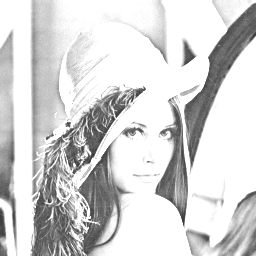

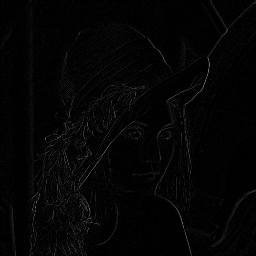

In [3]:
cv2_imshow(LL)
cv2_imshow(R)

In [12]:
#coloque sua resposta aqui no formato de comentário. Use código, se achar necessário. 
# No código acima calcula um nível de wavelet em haa. depois ela faz um merge com as 3 matrizes (LH, HL, HH) que são detalhes da imagem
# A vantagem do wavelet é que ao mesmo tempo que você encontra o contorno você ganha o controle (possibilidade de
# guardar o detalhe)
# Assim, como resultado final do R=np.maximum(np.maximum(LH,HL),HH) é possível obter o contorno da imagem (detalhe da imagem)

**PROBLEMA 2 (2.0 PONTOS).** Considere a função abaixo, que recebe quatro parâmetros: uma imagem em níveis de cinza, a coordenada de uma pixel (x,y) e um valor T.

In [24]:
def enigma(img,x,y,T):
  if abs(img[x+1][y]-img[x][y])>=T:
    return 255
  else:
    return 0

Utilize esta função para calcular um contorno da imagem lena.png, lida no código abaixo:

(512, 512, 3)


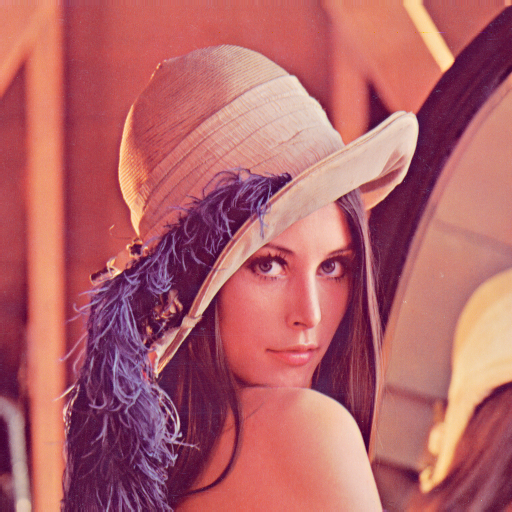

In [18]:
import cv2 as cv
from google.colab.patches import cv2_imshow
img = cv.imread('lena.png')
print(img.shape)
cv2_imshow(img)

In [71]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
lin, col= gray_img.shape

T = np.median(gray_img)
for l in range(lin-1):
  for c in range(col -1):
    # print(l, c)
    gray_img[l, c] = enigma(gray_img, l, c, T)

# def enigma(img,x,y,T):

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  


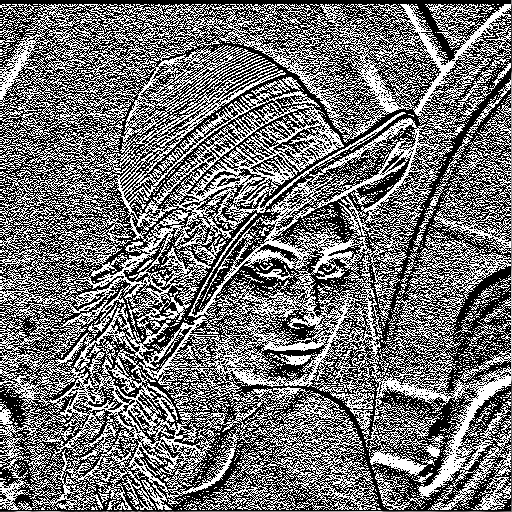

In [72]:
cv2_imshow(gray_img)

**PROBLEMA 3 (3.0 PONTOS).** A subtração de background (fundo) é uma técnica muito comum para detectar objetos em movimentação em uma cena. Seu esquema de implementação é mostrado abaixo.

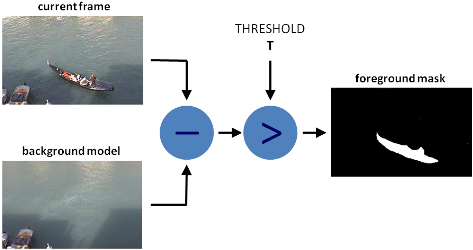

In [73]:
import cv2 as cv
from google.colab.patches import cv2_imshow
img = cv.imread('backgroundsubtraction.png')

cv2_imshow(img)

Usando o frame e o background abaixo, implemente a operação de subtração de background em OpenCV.

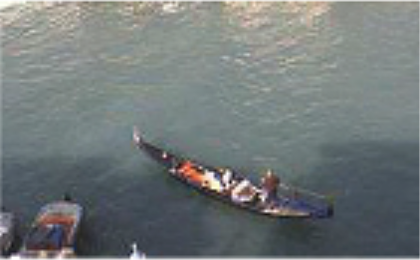

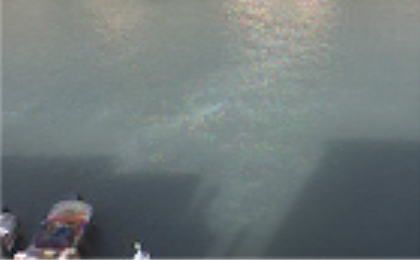

In [74]:
import cv2 as cv
from google.colab.patches import cv2_imshow
frame = cv.imread('frame.png')
cv2_imshow(frame)
back = cv.imread('background.png')
cv2_imshow(back)

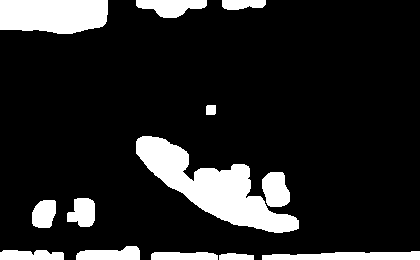

In [197]:
## GAUSSIAN BLUR
# https://stackoverflow.com/questions/34615331/opencv-background-subtraction
gray_img = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
first_gray = cv.GaussianBlur(gray_img, (25, 25), 0)

gray_back = cv.cvtColor(back, cv.COLOR_BGR2GRAY)
second_gray = cv.GaussianBlur(gray_back, (25, 25), 0)

# In each iteration, calculate absolute difference between current frame and reference frame
difference = cv.absdiff(first_gray, second_gray)

# Apply thresholding to eliminate noise
thresh = cv.threshold(difference, 25, 255, cv.THRESH_BINARY)[1]
thresh = cv.dilate(thresh, None, iterations=4)
cv2_imshow(thresh)

**PROBLEMA 4 (3.0 PONTOS).** Abaixo, temos um código em OpenCV que abre uma imagem BGR com três canais de cor, cada cor representada como um número inteiro. 

O sistema de cores CMYK é um sistema de cores subtrativo formado pelas cores Ciano (C), Magenta (M), Amarelo (Y) e Preto (K) e, estas cores, trabalham no intervalo [0.0,1.0]. Abaixo, temos as fórmulas de conversão de RGB para CMYK:


*   K=1-max(R,G,B)/255
*   C=(1-K-R/255)/(1-K)
*   M=(1-K-G/255)/(1-K)
*   Y=(1-K-B/255)/(1-K)

Escreva um programa em OpenCV que converta a imagem BGR para CMYK. Imprima o shape da imagem convertida e exiba os canais gerados.

(512, 512, 3)


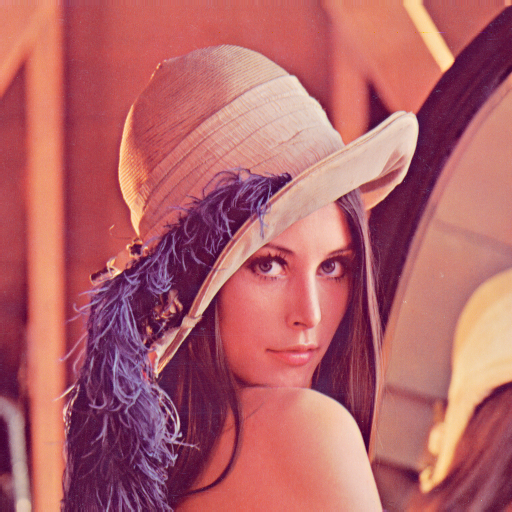

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
img = cv.imread('lena.png')
print(img.shape)
cv2_imshow(img)

In [189]:
#implemente sua solução aqui
# K=1-max(R,G,B)/255
# C=(1-K-R/255)/(1-K)
# M=(1-K-G/255)/(1-K)
# Y=(1-K-B/255)/(1-K)
img_rgb = cv.cvtColor(cv.imread('lena.png'), cv.COLOR_BGR2RGB)
R, G, B = cv.split(img_rgb)

# cv2_imshow(B)
# print(R)

K = 1 - np.maximum(np.maximum(R,G),B)/ 255
C = (1 - K - R / 255 ) / ( 1 - K )
M = (1 - K - G / 255 ) / ( 1 - K )
Y = (1 - K - B / 255 ) / ( 1 - K )


img_cmyk = cv.merge((C, M, Y , K))

(512, 512, 4)


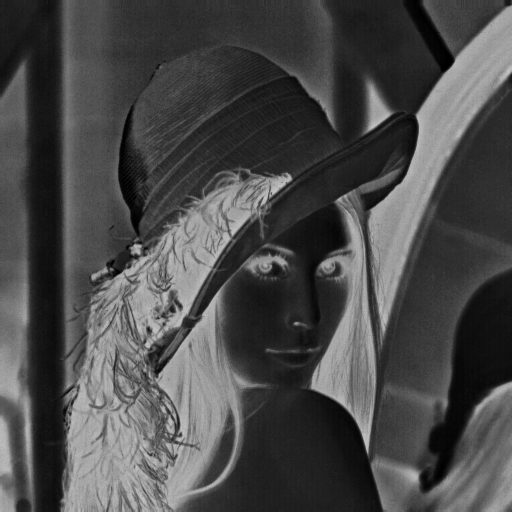

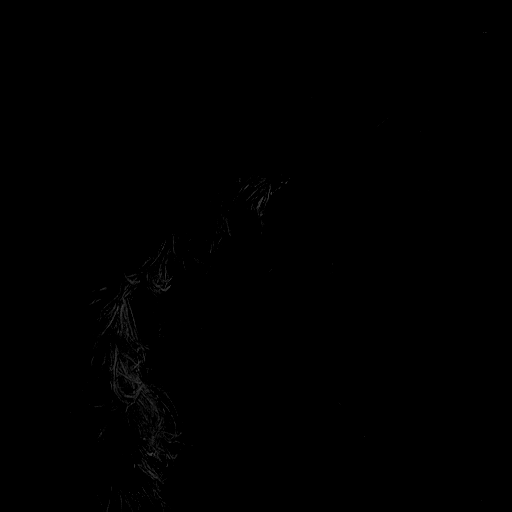

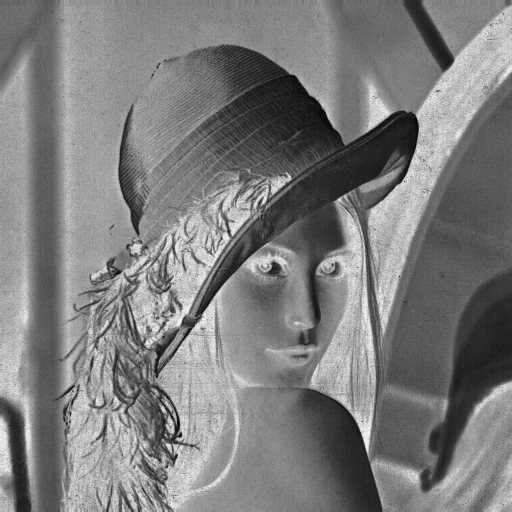

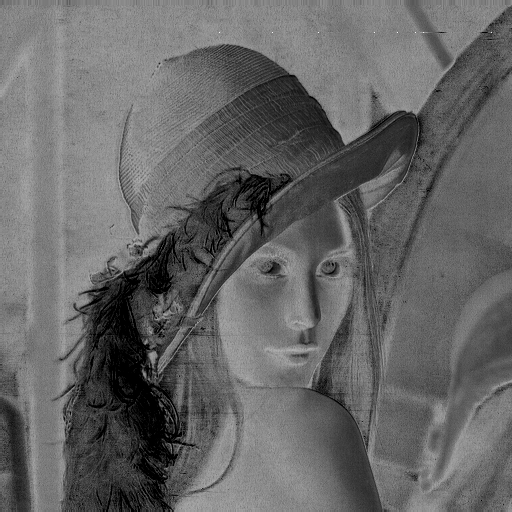

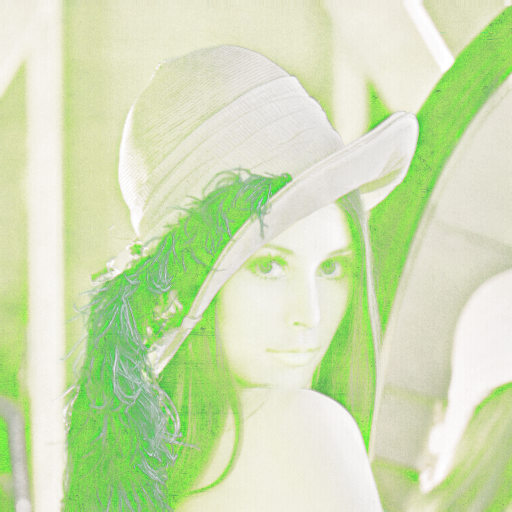

In [190]:
print(img_cmyk.shape)
cv2_imshow(K * 255)
cv2_imshow(C * 255)
cv2_imshow(M * 255)
cv2_imshow(Y * 255)
cv2_imshow(img_cmyk * 255)